In [1]:
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import text, sequence

import re
import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

In [2]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 100


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].to_numpy()
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [7]:
train['comment_text'][3645]

'"\n\n as daft as it sounds yes, if it cant be verified it gets removed plain and simple i suggest you reread these core wikipedia policies wp:truth wp:verifable wp:rs wp:nor and wp:nor i hav enot intentions in edit warring with you over it but be warned since it isnt sourced anyone can remove it and report you for vandelism. (talk - contrib) \n\n (As it says on my talk page, I prefer to have discussions all in the same place. I am watching this page, so please reply here. To this end I have taken the liberty of moving your previous reply here.)\n\n So if I add a statement that there are no vacuum tubes in SSDs either, you\'ll insist on a source for that too? \n\n Seriously, you are mistaken on a few points. I think you need to read WP:VERIFY yourself: \n\n  All material in Wikipedia mainspace, including everything in articles, lists and captions, must be verifiable. All quotations and any material whose verifiability has been challenged or is likely to be challenged, must include an i

In [8]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;\n]')
BAD_SYMBOLS_RE = re.compile('[^a-z ]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
train['comment_text'] = train['comment_text'].apply(clean_text)

In [9]:
train['comment_text'][3645]

'daft sounds yes cant verified gets removed plain simple suggest reread core wikipedia policies wptruth wpverifable wprs wpnor wpnor hav enot intentions edit warring warned since isnt sourced anyone remove report vandelism talk contrib says talk page prefer discussions place watching page please reply end taken liberty moving previous reply add statement vacuum tubes ssds either youll insist source seriously mistaken points think need read wpverify material wikipedia mainspace including everything articles lists captions must verifiable quotations material whose verifiability challenged likely challenged must include inline citation directly supports material material needs source one may removed emphasis added jeh note distinction wrote cant verified gets removed first claim ssds contain disks obviously verified part definition term first reference article confirms claim description devices dont need cite source particular instance claim second except blp issues wpv states unsourced m

In [10]:
tokenizer = text.Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train["comment_text"].values)

In [11]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 217408 unique tokens.


In [12]:
X = tokenizer.texts_to_sequences(train["comment_text"].values)
X = sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

In [56]:
X[3645]

array([  826,   144,    59,   134,   113,    70,    44,    47,    25,
         406,   530,   278,   113,   444, 15777,   178,    62, 15778,
          22,  5686, 13443,   196,   756,  5398,  1026,   563,   226,
         113,    16,   940,    80,   113,  1446,  2350,    19,   991,
        6857,    44,  5225,  9002, 11141,  1461,  5398,    44,   113,
         278,  4665,  2676,    89, 30966,   178,    11,    63,  4359,
          10,    25,   406,   294,   737,  1522,  3573,     5,  1446,
        3133,   140,    44,  1234,   559, 30967,   121,     8, 15777,
         259,   110,  9124,   303,   154,   488,   998,   222,     5,
          12,  1757, 22293,   205,   279,     8,   113,   100,  2761,
        3047,   312,     9, 10325,     6,    41,   190,   131,  2273,
          94])

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)

In [15]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(143613, 100) (143613, 6)
(15958, 100) (15958, 6)


In [28]:
EMBEDDING_DIM = 50

model = keras.Sequential()
model.add(layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(layers.Dropout(0.3))
model.add(layers.LSTM(50, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 2
batch_size = 20

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           2500000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 306       
Total params: 2,520,506
Trainable params: 2,520,506
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/2
6463/6463 [==============================] - 525s 81ms/step - loss: 0.0966 - accuracy: 0.9456 - val_loss: 0.0490 - val_accuracy: 0.9941
Epoch 2/2
6463/6463 [==============================] - 530s 82ms/step - loss: 0.0458 - accuracy: 0.9940 - val_loss: 0.0495 - val_accuracy: 0.9941


In [31]:
model.evaluate(X_val,y_val)

499/499 [==============================] - 4s 7ms/step - loss: 0.0508 - accuracy: 0.9938


[0.050848182290792465, 0.9937962293624878]

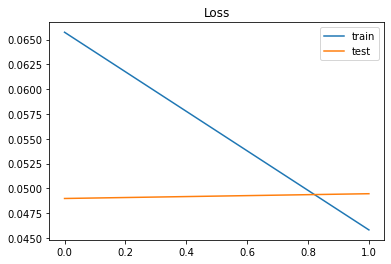

In [32]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [70]:
new_insult = ['good day sir im pleased to inform you youre mothers a whore']
new_insult[0] = clean_text(new_insult[0])
seq = tokenizer.texts_to_sequences(new_insult)
padded = sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)

In [71]:
pred

array([[0.94411707, 0.03630698, 0.5518686 , 0.01969483, 0.625558  ,
        0.104087  ]], dtype=float32)

In [35]:
list_classes

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [46]:
test = pd.read_csv("test.csv")
test_lab = pd.read_csv("test_labels.csv")

In [47]:
df_test = test.merge(test_lab, on = 'id')

In [48]:
df_test = df_test[df_test['toxic'] != -1] 

In [49]:
df_test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
7,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0


In [51]:
y_test = df_test[list_classes].to_numpy()

In [54]:
df_test['comment_text'] = df_test['comment_text'].apply(clean_text)
X_test = tokenizer.texts_to_sequences(df_test["comment_text"].values)
X_test = sequence.pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)

In [55]:
model.evaluate(X_test,y_test)

2000/2000 [==============================] - 14s 7ms/step - loss: 0.0800 - accuracy: 0.9972


[0.07999448478221893, 0.9972334504127502]